In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [99]:
path = '../data/2023/generated/pre-train/not_english_final.csv'
def load_data(path):
  return pd.read_csv(path)
sample = load_data(path)

C:\Users\pm_\AppData\Local\Temp\ipykernel_13532\2898774731.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


In [100]:
sample.head()

,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Positivity,Response Rate,Question Num,index1,Region
0,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How good are teaching staff at explaining thi...,236.0,285.0,59.0,153.0,18.0,6.0,89.8,83.2,Q01,25936,Non-English
1,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How often do teaching staff make the subject ...,236.0,285.0,49.0,148.0,34.0,5.0,83.5,83.2,Q02,25937,Non-English
2,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How often is the course intellectually stimul...,236.0,285.0,152.0,77.0,6.0,1.0,97.0,83.2,Q03,25938,Non-English
3,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),How often does your course challenge you to a...,236.0,285.0,109.0,100.0,25.0,2.0,88.6,83.2,Q04,25939,Non-English
4,NI,Northern Ireland,CAH01-01-02,Medicine (non-specific),To what extent have you had the chance to exp...,234.0,285.0,92.0,108.0,29.0,5.0,85.5,83.2,Q05,25940,Non-English


In [101]:
def get_processed_data(data, year):
  sample = data.copy()
  # sample = data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
  # sample = sample[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Positivity', 'Question Num', 'Region']]
  sample = sample[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Positivity', 'Question Num']]
  sample.loc[:, 'Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
  sample.loc[:, 'Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
  sample.loc[:, 'Opt-3'] = round((sample['Option 3'] / sample['Responses']) * 100, 1)
  sample.loc[:, 'Opt-4'] = round((sample['Option 4'] / sample['Responses']) * 100, 1)
  # else:
  #   sample.loc[:, 'Opt-1'] = sample['Option 1']
  #   sample.loc[:, 'Opt-2'] = sample['Option 2']
  #   sample.loc[:, 'Opt-3'] = sample['Option 3']
  #   sample.loc[:, 'Opt-4'] = sample['Option 4']
  only_options = sample[['Question Num', 'Opt-1', 'Opt-2', 'Opt-3', 'Opt-4']]
  # region_false = ''
  # if region == 'English': region_false = 'R_Non-English'
  # else: region_false = 'R_English'
  # only_options[region] = [region]*len(only_options['Opt-1'])
  only_options = only_options.copy()
  only_options.loc[:, 'Positivity'] = only_options['Opt-1'] + only_options['Opt-2']
  # data_2 = pd.get_dummies(only_options, prefix=['N'], dtype=float)
  # data_2[region_false] = [0.0]*len(data_2)
  return only_options

In [102]:
sample = get_processed_data(sample, 2023)
sample.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
0,Q01,25.0,64.8,7.6,2.5,89.8
1,Q02,20.8,62.7,14.4,2.1,83.5
2,Q03,64.4,32.6,2.5,0.4,97.0
3,Q04,46.2,42.4,10.6,0.8,88.6
4,Q05,39.3,46.2,12.4,2.1,85.5


In [103]:
only_options = sample[['Opt-1', 'Opt-2', 'Opt-3', 'Opt-4', 'Positivity']]
only_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78111 entries, 0 to 78110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opt-1       78111 non-null  float64
 1   Opt-2       78111 non-null  float64
 2   Opt-3       78111 non-null  float64
 3   Opt-4       78111 non-null  float64
 4   Positivity  78111 non-null  float64
dtypes: float64(5)
memory usage: 3.0 MB


In [104]:
only_options.head()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
0,25.0,64.8,7.6,2.5,89.8
1,20.8,62.7,14.4,2.1,83.5
2,64.4,32.6,2.5,0.4,97.0
3,46.2,42.4,10.6,0.8,88.6
4,39.3,46.2,12.4,2.1,85.5


In [105]:
only_options.describe()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
count,78111.000000,78111.000000,78111.000000,78111.000000,78111.000000
mean,33.653173,46.560266,15.143036,4.210739,80.213439
std,16.058440,12.312469,10.319855,5.663114,13.618605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.100000,39.000000,7.700000,0.000000,73.100000
50%,32.100000,46.700000,13.800000,2.500000,82.400000
75%,43.500000,54.400000,20.800000,6.200000,90.000000
max,100.000000,100.400000,80.000000,84.600000,101.100000


In [106]:
only_options.sort_values(by='Positivity', axis=0, ascending=False)

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
40645,57.8,43.3,0.0,0.0,101.1
40699,57.8,43.3,0.0,0.0,101.1
20256,46.7,54.3,0.0,0.0,101.0
20255,51.0,50.0,0.0,0.0,101.0
20250,42.3,58.7,0.0,0.0,101.0
...,...,...,...,...,...
64062,0.0,0.0,50.0,50.0,0.0
19780,0.0,0.0,30.0,70.0,0.0
44724,0.0,0.0,60.0,40.0,0.0
62334,0.0,0.0,50.0,50.0,0.0


In [141]:
num_rows = 27
num_sets = len(only_options) // num_rows  # Calculate the number of sets
reshaped_data = only_options.values.reshape(num_sets, num_rows, 5)

# Split into training and test sets
train_data = reshaped_data[:, :26, :4]  # First 26 rows of each set as training data
test_data = reshaped_data[:, 26, :4]    # 27th row of each set as test data

X = reshaped_data[:, :26, :4]
y = reshaped_data[:, 26, :4]

X = X.reshape(-1, 26 * 4)
y = y.reshape(-1, 4)

In [142]:
print(X.shape)
print(y.shape)

(2893, 104)
(2893, 4)


In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
model_new = Sequential()
model_new.add(Dense(128, input_dim=26*4, activation='relu'))
model_new.add(Dense(128, activation='relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.3))
model_new.add(Dense(64, activation='relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.3))
model_new.add(Dense(64, activation='relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.3))
# model_new.add(Dense(32, activation='relu'))
model_new.add(Dense(16, activation='relu'))
model_new.add(Dense(4))

# Compile the model
model_new.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_new = model_new.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss_new = model_new.evaluate(X_test, y_test)
print("Test Loss:", loss_new)

c:\user_exe\00_Leeds\Dissertation\project-files\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 893.5815 - val_loss: 631.0015
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 679.0956 - val_loss: 331.5269
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301.9583 - val_loss: 236.7712
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130.1543 - val_loss: 92.9311
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.6051 - val_loss: 54.9426
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.4646 - val_loss: 54.1409
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.7242 - val_loss: 46.0731
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.9280 - val_loss: 43.7099
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.2097 - val_loss: 40.2021
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.0417 - val_loss: 43.9582
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.1610 - val_loss: 53.3350
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━

In [146]:
sample_input = X_test[0].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Sample Input:", X_test[0])
print("Input Shape:", X_test[0].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Sample Input: [34.4 53.1  9.4  3.1 18.8 68.8  9.4  3.1 43.8 43.8  6.2  6.2 50.  37.5
  9.4  3.1 40.6 50.   3.1  6.2 28.1 46.9 21.9  3.1 46.9 43.8  6.2  3.1
 18.8 65.6  9.4  6.2 30.  43.3 23.3  3.3 34.4 43.8 12.5  9.4 25.  53.1
 18.8  3.1 21.9 43.8 25.   9.4 21.9 43.8 21.9 12.5 12.5 59.4 18.8  9.4
 31.2 46.9 15.6  6.2 31.2 50.  12.5  6.2 21.9 56.2  6.2 15.6 34.4 31.2
 21.9 12.5 33.3 56.7  3.3  6.7 61.3 29.   3.2  6.5 30.  60.   6.7  3.3
 29.  58.1 12.9  0.  18.8 46.9 21.9 12.5 15.6 25.  46.9 12.5 30.  46.7
 20.   3.3 48.4 32.3  9.7  9.7]
Input Shape: (104,)
Predicted Output: [27.5 43.4  8.9  4.2]
Actual Output: [28.1 56.2  6.2  6.2]


In [147]:
sample_input = X_test[10].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Sample Input:", X_test[10])
print("Input Shape:", X_test[10].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Sample Input: [11.3 69.4 16.1  3.2  4.8 46.8 40.3  8.1 15.  58.4 23.4  3.4 29.  56.5
 11.3  3.2 50.  37.1  8.1  4.8 11.3 62.9 25.8  0.  32.3 43.5 24.3  0.
 27.4 41.9 27.4  3.2 32.3 48.4 16.1  3.2 22.6 38.7 30.7  8.1  8.1 71.
 17.8  3.2 16.1 66.1 17.8  0.   0.  51.6 29.  19.4 11.3 41.9 38.7  8.1
 14.5 21.  50.  14.5  6.5 54.8 24.2 14.5 25.8 53.2  8.1 12.9 19.4 45.2
 14.5 21.  36.8 41.8 13.4  8.4 46.8 40.3  8.1  4.8 20.  41.7 38.1  0.
  6.5 21.  53.2 19.4 10.  28.4 43.4 18.4  3.2 24.2 51.6 21.  16.7 25.
 45.1 13.4 25.8 38.7 14.5 21. ]
Input Shape: (104,)
Predicted Output: [19.5 41.2 12.7  7.8]
Actual Output: [11.3 45.2 12.9 11.3]


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE) - Train: 3.2679646831923477
Mean Squared Error (MSE) - Train: 19.10955967642044
R² Score - Train: 0.7185924602396273
Mean Absolute Error (MAE) - Test: 3.5188760992261825
Mean Squared Error (MSE) - Test: 24.907267533188392
R² Score - Test: 0.6899219092532947


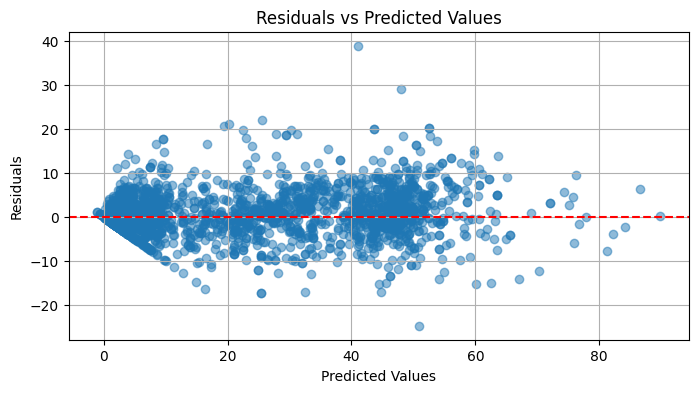

In [148]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Performance metrics for training data
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Print performance metrics for training data
print(f"Mean Absolute Error (MAE) - Train: {mae_train}")
print(f"Mean Squared Error (MSE) - Train: {mse_train}")
print(f"R² Score - Train: {r2_train}")

# # Plot actual vs predicted values for training data
# plt.figure(figsize=(5, 4))
# plt.scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
# plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], color='red', label='Ideal Fit')
# plt.xlabel('Actual Values', fontsize=15)
# plt.ylabel('Predicted Values', fontsize=15)
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
# plt.title(f'Train R-squared: {round(r2_train, 2)}', fontsize=18, weight='bold')
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.show()

# Performance metrics for test data
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

# Print performance metrics for test data
print(f"Mean Absolute Error (MAE) - Test: {mae_test}")
print(f"Mean Squared Error (MSE) - Test: {mse_test}")
print(f"R² Score - Test: {r2_test}")

# # Plot actual vs predicted values for test data
# plt.figure(figsize=(5, 4))
# plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
# plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', label='Ideal Fit')
# plt.xlabel('Actual Values', fontsize=15)
# plt.ylabel('Predicted Values', fontsize=15)
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
# plt.title(f'Test R-squared: {round(r2_test, 2)}', fontsize=18, weight='bold')
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

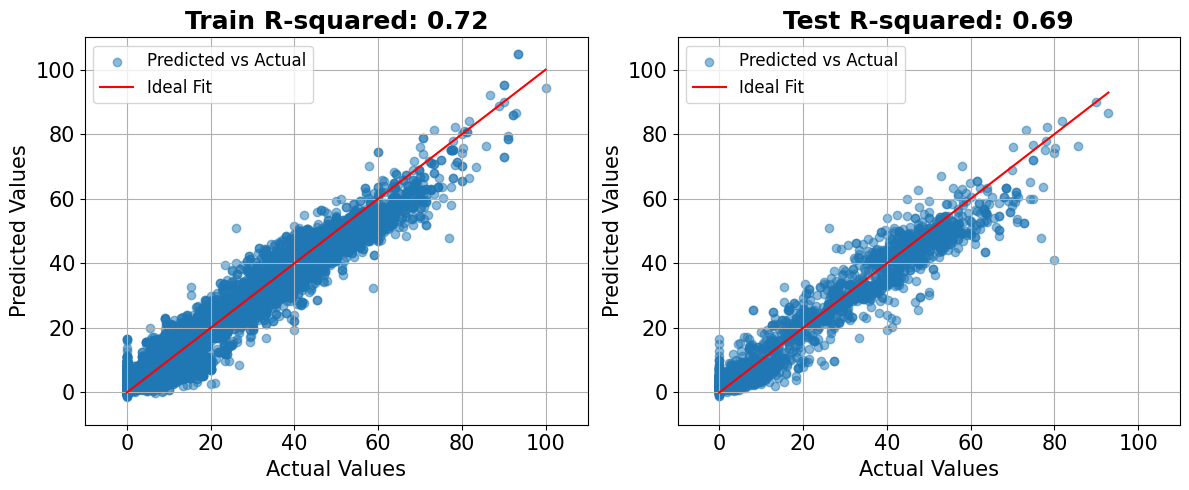

In [149]:
# Create a figure with a grid of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot 1: Actual vs Predicted for Training Data
axes[0].scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], color='red', label='Ideal Fit')
axes[0].set_xlabel('Actual Values', fontsize=15)
axes[0].set_ylabel('Predicted Values', fontsize=15)
axes[0].set_xlim(-10, 110)
axes[0].set_ylim(-10, 110)
# axes[0].set_yticks(fontsize=15)
# axes[0].set_xticks(fontsize=15)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_title('Train R-squared: {}'.format(round(r2_train, 2)), fontsize=18, weight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(True)

# Plot 2: Actual vs Predicted for Test Data
axes[1].scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
axes[1].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', label='Ideal Fit')
axes[1].set_xlabel('Actual Values', fontsize=15)
axes[1].set_ylabel('Predicted Values', fontsize=15)
axes[1].set_xlim(-10, 110)
axes[1].set_ylim(-10, 110)
# axes[1].set_yticks(fontsize=15)
# axes[1].set_xticks(fontsize=15)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].set_title('Test R-squared: {}'.format(round(r2_test, 2)), fontsize=18, weight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

dict_keys(['loss', 'val_loss'])


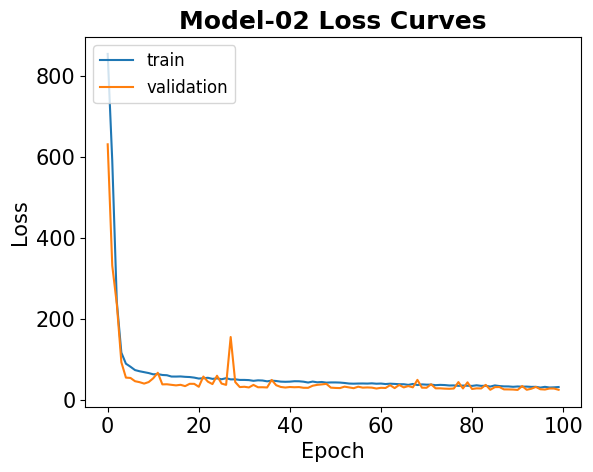

In [150]:
print(history_new.history.keys())
# summarize history for loss
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model-02 Loss Curves', fontsize=18, weight='bold')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

In [151]:
sample_input = X_test[19].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[19])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Output: [15.9 40.3 14.5 10.3]
Actual Output: [19.1 37.1 18.  21.3]


In [152]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [153]:
predictions_rounded = np.round(predictions, 1)
sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
test_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Test_Pred_{i}' for i in range(predictions_rounded.shape[1])])
test_predictions_df['Test_Pred'] = sum_predicted
test_predictions_df = test_predictions_df.astype('float')
test_predictions_df = test_predictions_df.round(1)

sum_predicted = np.sum(y_test[:, :2], axis=1)
test_actual_df = pd.DataFrame(y_test, columns=[f'Test_Actual_{i}' for i in range(y_test.shape[1])])
test_actual_df['Test_Actual'] = sum_predicted

In [154]:
predictions_rounded = np.round(predictions_train, 1)
sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
train_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Train_Pred_{i}' for i in range(predictions_rounded.shape[1])])
train_predictions_df['Train_Pred'] = sum_predicted
train_predictions_df = train_predictions_df.astype('float')
train_predictions_df = train_predictions_df.round(1)

sum_predicted = np.sum(y_train[:, :2], axis=1)
train_actual_df = pd.DataFrame(y_train, columns=[f'Train_Actual_{i}' for i in range(y_train.shape[1])])
train_actual_df['Train_Actual'] = sum_predicted

In [155]:
test_compare = pd.DataFrame()
test_compare['Pred'] = test_predictions_df['Test_Pred']
test_compare['Actual'] = test_actual_df['Test_Actual']
test_compare['Pred_0'] = test_predictions_df['Test_Pred_0']
test_compare['Actual_0'] = test_actual_df['Test_Actual_0']
test_compare['Pred_1'] = test_predictions_df['Test_Pred_1']
test_compare['Actual_1'] = test_actual_df['Test_Actual_1']
test_compare['Pos_Diff'] = test_compare['Pred'] - test_compare['Actual']
test_compare['0_Diff'] = test_compare['Pred_0'] - test_compare['Actual_0']
test_compare['1_Diff'] = test_compare['Pred_1'] - test_compare['Actual_1']

train_compare = pd.DataFrame()
train_compare['Pred'] = train_predictions_df['Train_Pred']
train_compare['Actual'] = train_actual_df['Train_Actual']
train_compare['Pred_0'] = train_predictions_df['Train_Pred_0']
train_compare['Actual_0'] = train_actual_df['Train_Actual_0']
train_compare['Pred_1'] = train_predictions_df['Train_Pred_1']
train_compare['Actual_1'] = train_actual_df['Train_Actual_1']
train_compare['Pos_Diff'] = train_compare['Pred'] - train_compare['Actual']
train_compare['0_Diff'] = train_compare['Pred_0'] - train_compare['Actual_0']
train_compare['1_Diff'] = train_compare['Pred_1'] - train_compare['Actual_1']

In [156]:
test_compare.describe().iloc[1][6:]

Pos_Diff   -1.888601
0_Diff     -0.625734
1_Diff     -1.262867
Name: mean, dtype: float64

In [157]:
train_compare.describe().iloc[1][6:]

Pos_Diff   -1.970787
0_Diff     -0.653933
1_Diff     -1.316854
Name: mean, dtype: float64